# Heatmap, PCA for Logistic Regression 
 Code for Looking at the Data, Creating Heat Map, Peforming PCA with 2,4, and 5 Components for Yeo-Johnson scaled data for Logistic Regression


In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
import math
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-1-33987b72b535>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [2]:
#load in dataset
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load dataset, spambase from path Google Drive folder where data is stored
path = "/content/drive/Project/spambase_csv.csv"

spambase = pd.read_csv(path)

In [4]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Data Description



In [5]:
#read columns and null/non-null rows and columns, data types - there are no NAs or missing values in our dataset
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
#replaced "word_freq" in column names with "WF" for readability and later data visualization label ease
new_names = [i.replace("word_freq", "WF") for i in list(spambase.columns) ]
new_names = [j.replace("char_freq", "CF") for j in new_names]
new_names = [k.replace("capital_run_length", "CRL") for k in new_names]
#rename the columns for better readability
spambase = spambase.set_axis(new_names + list(spambase.columns)[-1:-10], axis=1, copy=False)

spambase.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WF_make        4601 non-null   float64
 1   WF_address     4601 non-null   float64
 2   WF_all         4601 non-null   float64
 3   WF_3d          4601 non-null   float64
 4   WF_our         4601 non-null   float64
 5   WF_over        4601 non-null   float64
 6   WF_remove      4601 non-null   float64
 7   WF_internet    4601 non-null   float64
 8   WF_order       4601 non-null   float64
 9   WF_mail        4601 non-null   float64
 10  WF_receive     4601 non-null   float64
 11  WF_will        4601 non-null   float64
 12  WF_people      4601 non-null   float64
 13  WF_report      4601 non-null   float64
 14  WF_addresses   4601 non-null   float64
 15  WF_free        4601 non-null   float64
 16  WF_business    4601 non-null   float64
 17  WF_email       4601 non-null   float64
 18  WF_you  

In [7]:
#descriptive statistics: we can already see that we have a lot of sparsity in the matrix
spambase.describe()


,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,...,CF_%3B,CF_%28,CF_%5B,CF_%21,CF_%24,CF_%23,CRL_average,CRL_longest,CRL_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
spambase.head()

,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,...,CF_%3B,CF_%28,CF_%5B,CF_%21,CF_%24,CF_%23,CRL_average,CRL_longest,CRL_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
#how much sparsity? let's calculate
from numpy import array
from numpy import count_nonzero
sparsity = 1.0 - count_nonzero(spambase) / spambase.size
sparsity

0.7712491287501217

 77% of the matrix is zero! This matrix has significant sparsity, as we suspected.


In [10]:
#plot correlation matrix. Color encoding: dark red indicates strong negative correlation between two variables, dark blue - strong positive correlation between two variables
corr = spambase.corr()
corr.style.format(precision=3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,WF_receive,WF_will,WF_people,WF_report,WF_addresses,WF_free,WF_business,WF_email,WF_you,WF_credit,WF_your,WF_font,WF_000,WF_money,WF_hp,WF_hpl,WF_george,WF_650,WF_lab,WF_labs,WF_telnet,WF_857,WF_data,WF_415,WF_85,WF_technology,WF_1999,WF_parts,WF_pm,WF_direct,WF_cs,WF_meeting,WF_original,WF_project,WF_re,WF_edu,WF_table,WF_conference,CF_%3B,CF_%28,CF_%5B,CF_%21,CF_%24,CF_%23,CRL_average,CRL_longest,CRL_total,class
WF_make,1.000,-0.017,0.066,0.013,0.023,0.060,0.008,-0.004,0.106,0.041,0.188,0.106,0.066,0.037,0.028,0.059,0.082,0.053,0.128,0.021,0.197,-0.024,0.134,0.188,-0.073,-0.062,-0.066,-0.049,-0.041,-0.053,-0.039,-0.032,-0.041,-0.028,-0.045,-0.055,-0.057,-0.008,-0.011,-0.036,-0.010,-0.026,-0.024,-0.022,-0.037,-0.034,-0.001,-0.018,-0.027,-0.021,-0.033,0.058,0.117,-0.009,0.044,0.061,0.089,0.126
WF_address,-0.017,1.000,-0.034,-0.007,-0.024,-0.025,0.004,-0.016,-0.004,0.033,-0.007,-0.040,-0.019,-0.009,0.005,-0.009,-0.018,0.033,-0.055,-0.016,-0.018,-0.009,-0.021,0.002,-0.043,-0.038,-0.030,-0.029,-0.022,-0.028,-0.018,-0.003,-0.025,-0.004,-0.024,-0.028,-0.024,-0.009,-0.019,-0.015,-0.015,-0.025,-0.002,-0.020,-0.016,-0.024,-0.010,-0.016,-0.007,-0.050,-0.019,-0.014,-0.010,0.002,0.002,0.000,-0.023,-0.030
WF_all,0.066,-0.034,1.000,-0.020,0.078,0.088,0.037,0.012,0.094,0.032,0.048,0.083,0.048,0.009,0.122,0.064,0.036,0.122,0.139,0.031,0.157,-0.036,0.124,0.041,-0.088,-0.062,-0.109,-0.051,-0.058,-0.033,-0.039,-0.062,-0.055,-0.062,-0.048,-0.047,-0.067,0.032,-0.015,-0.047,-0.031,-0.006,-0.044,-0.053,-0.051,-0.057,0.029,-0.026,-0.033,-0.016,-0.033,0.108,0.088,-0.003,0.097,0.107,0.070,0.197
WF_3d,0.013,-0.007,-0.020,1.000,0.003,-0.010,0.020,0.010,-0.002,-0.005,-0.013,-0.019,-0.013,0.012,0.003,0.007,0.003,0.019,-0.011,-0.005,0.008,0.028,0.011,0.035,-0.015,-0.014,-0.011,-0.010,-0.008,-0.010,-0.008,-0.007,-0.008,-0.007,-0.006,-0.007,-0.008,-0.003,-0.005,-0.008,-0.006,-0.008,-0.009,-0.006,-0.013,-0.009,-0.003,-0.002,-0.001,-0.012,-0.007,-0.003,0.011,-0.000,0.005,0.022,0.021,0.057
WF_our,0.023,-0.024,0.078,0.003,1.000,0.054,0.147,0.030,0.021,0.034,0.068,0.067,0.031,0.003,0.056,0.083,0.143,0.062,0.099,0.032,0.137,-0.020,0.070,0.000,-0.073,-0.075,-0.088,-0.062,0.032,-0.052,-0.043,-0.027,-0.032,-0.027,-0.050,-0.049,-0.073,0.131,-0.042,-0.021,-0.048,0.115,-0.049,0.015,-0.042,-0.078,-0.027,-0.032,-0.033,-0.046,-0.026,0.026,0.042,0.002,0.053,0.052,0.002,0.242
WF_over,0.060,-0.025,0.088,-0.010,0.054,1.000,0.061,0.080,0.117,0.014,0.054,0.009,0.078,0.010,0.173,0.020,0.064,0.078,0.096,0.059,0.107,0.008,0.211,0.059,-0.084,-0.087,-0.069,-0.066,-0.049,-0.048,-0.046,-0.037,-0.034,-0.037,-0.054,-0.053,-0.057,-0.018,-0.048,-0.030,-0.029,-0.055,-0.031,-0.029,-0.054,-0.033,-0.014,-0.032,-0.019,-0.009,-0.015,0.065,0.106,0.020,-0.010,0.090,0.082,0.233
WF_remove,0.008,0.004,0.037,0.020,0.147,0.061,1.000,0.045,0.051,0.057,0.160,-0.001,0.013,-0.023,0.043,0.128,0.188,0.122,0.112,0.046,0.131,-0.002,0.065,0.031,-0.089,-0.080,-0.066,-0.067,-0.048,-0.058,-0.046,-0.041,-0.041,-0.041,-0.053,-0.054,-0.052,-0.015,-0.047,-0.022,-0.033,-0.050,-0.049,-0.034,-0.051,-0.056,-0.018,-0.031,-0.033,-0.052,-0.028,0.054,0.070,0.047,0.042,0.060,-0.008,0.332
WF_internet,-0.004,-0.016,0.012,0.010,0.030,0.080,0.045,1.000,0.105,0.083,0.128,-0.003,0.026,0.012,0.073,0.051,0.216,0.038,0.021,0.109,0.157,-0.016,0.089,0.034,-0.053,-0.041,-0.057,-0.050,-0.037,-0.043,-0.036,-0.034,-0.039,-0.035,-0.035,-0.034,-0.017,-0.012,-0.030,-0.006,-0.004,-0.044,-0.005,-0.030,-0.002,-0.038,-0.006,-0.021,-0.027,-0.032,-0.020,0.031,0.058,-0.008,0.011,0.038,0.040,0.207
WF_order,0.106,-0.004,0.094,-0.002,0.021,0.117,0.051,0.105,1.000,0.131,0.138,0.030,0.035,0.067,0.238,0.008,0.158,0.099,0.039,0.123,0.159,-0.020,0.127,0.099,-0.070,-0.050,-0.065,-0.057,-0.045,-0.044,-0.040,-0.034,-0.014,-0.034,-0.042,-0.056,-0.033,-0.002,-0.041,-0.010,-0.035,-0.048,-0.034,-0.035,-0.076,-0.057,0.008,-0.026,-0.015,-0.031,0.014,0.044,0.149,-0.001,0.111,0.189,0.

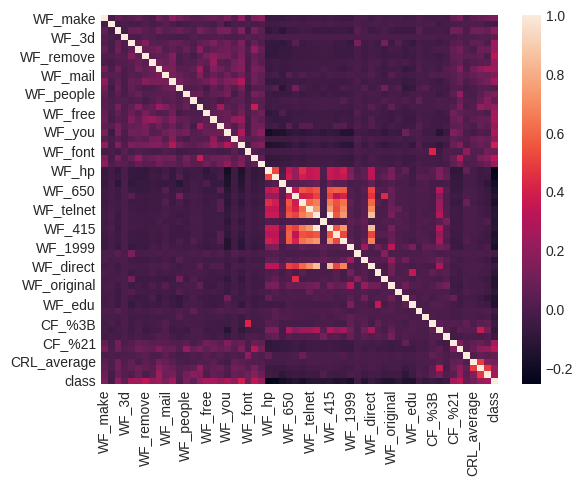

In [11]:
#representing the correlation matrix in a heatmap
sns.heatmap(corr);


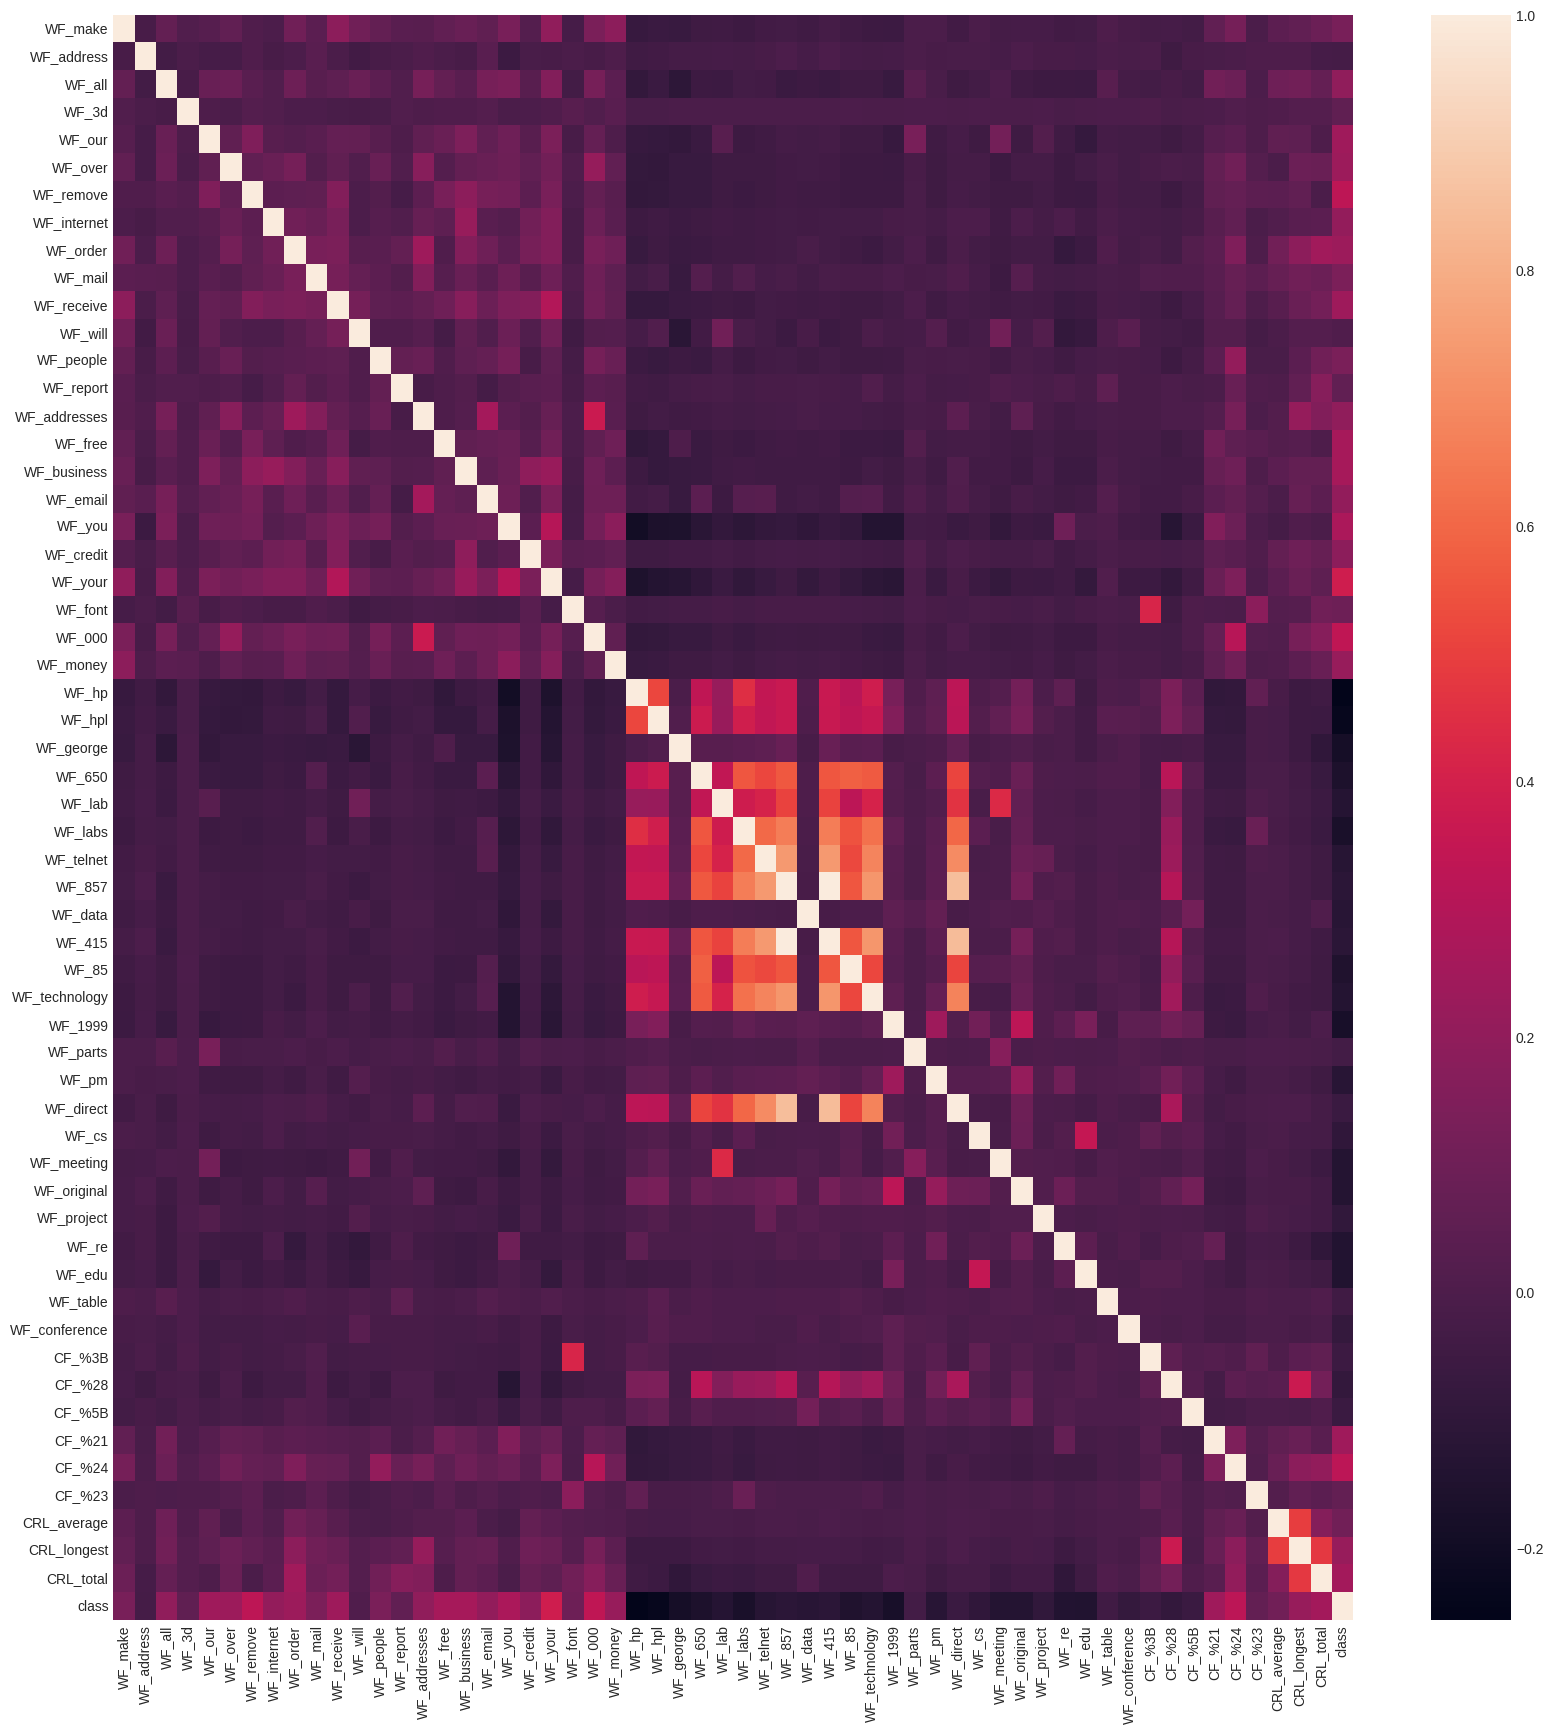

In [12]:
#plot a detailed representation of the correlation matrix.
#Color encoding: dark red indicates strong negative correlation between two variables,
#dark blue - strong positive correlation between two variables
corr = spambase.corr()

# get the tick label font size
fontsize_pt = plt.rcParams['ytick.labelsize']
dpi = 72.27

# compute the matrix height in points and inches
matrix_height_pt = 20 * corr.shape[0]
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(20,figure_height),
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))
sns.heatmap(corr,  xticklabels=1, yticklabels=1);

In [13]:
#sns.pairplot(spambase)
#plt.show();

In [14]:
#looking at duplicate entries
spambase[spambase.duplicated()==True]

,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,...,CF_%3B,CF_%28,CF_%5B,CF_%21,CF_%24,CF_%23,CRL_average,CRL_longest,CRL_total,class
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [15]:
#we can create a revised dataset with the duplicated removed for the original data
newspambase=spambase.drop_duplicates()
newspambase.describe()


,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,...,CF_%3B,CF_%28,CF_%5B,CF_%21,CF_%24,CF_%23,CRL_average,CRL_longest,CRL_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [16]:
# # Plot the last 4 columns
# plt.figure()
# sns.pairplot(newspambase, vars = newspambase.columns[54:58], hue ="class", markers=["o", "s"],diag_kind="auto")
# plt.show()


In [17]:
#binary spam data set that we transformed in r and output to a csv
#load dataset, binary spambase from path in Google Drive folder
path = "/content/drive/Project/binary_spam.csv" 

bspambase = pd.read_csv(path)
#replaced "word_freq" in column names with "WF" for readability and later data visualization label ease
new_names = [i.replace("word_freq", "WF") for i in list(bspambase.columns) ]
new_names = [j.replace("char_freq", "CF") for j in new_names]
new_names = [k.replace("capital_run_length", "CRL") for k in new_names]
#rename the columns for better readability
bspambase = bspambase.set_axis(new_names + list(bspambase.columns)[-1:-10], axis=1, copy=False)

In [18]:
bspambase.head() #looking at the first 5 entries of data

,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,...,CF_.3B,CF_.28,CF_.5B,CF_.21,CF_.24,CF_.23,CRL_average,CRL_longest,CRL_total,class
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3.756,61,278,1
1,1,1,1,0,1,1,1,1,0,1,...,0,1,0,1,1,1,5.114,101,1028,1
2,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,9.821,485,2259,1
3,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1
4,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1


In [19]:
bspambase.describe() #looking at the descriptive statistics for the binary data


,WF_make,WF_address,WF_all,WF_3d,WF_our,WF_over,WF_remove,WF_internet,WF_order,WF_mail,...,CF_.3B,CF_.28,CF_.5B,CF_.21,CF_.24,CF_.23,CRL_average,CRL_longest,CRL_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.228863,0.195175,0.410346,0.010215,0.379917,0.217127,0.175397,0.179092,0.168007,0.282982,...,0.171702,0.590089,0.114975,0.490763,0.304282,0.163008,5.191515,52.172789,283.289285,0.394045
std,0.420147,0.396378,0.491950,0.100564,0.485419,0.412334,0.380347,0.383471,0.373913,0.450497,...,0.377162,0.491870,0.319026,0.499969,0.460153,0.369413,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.706000,43.000000,266.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1102.500000,9989.000000,15841.000000,1.000000


In [20]:
# #plot a detailed representation of the correlation matrix for the binary dataset.
# #Color encoding: dark red indicates strong negative correlation between two variables,
# #dark blue - strong positive correlation between two variables
# corr = bspambase.corr()

# # get the tick label font size
# fontsize_pt = plt.rcParams['ytick.labelsize']
# dpi = 72.27

# # compute the matrix height in points and inches
# matrix_height_pt = 20 * corr.shape[0]
# matrix_height_in = matrix_height_pt / dpi

# # compute the required figure height
# top_margin = 0.04  # in percentage of the figure height
# bottom_margin = 0.04 # in percentage of the figure height
# figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# # build the figure instance with the desired height
# fig, ax = plt.subplots(
#         figsize=(20,figure_height),
#         gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))
# sns.heatmap(corr,  xticklabels=1, yticklabels=1);

## Using PCA to deal with sparsity (using only nonzero and important features) and then fit logistic model.



In [21]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# distributing the dataset into two components X and Y

#all columns except class (y)
X = newspambase.iloc[:,:-2].values

#target variable y is class (1 or 0) so spam or not spam
y = newspambase.iloc[:,-1].values


In [23]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# # performing preprocessing part
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [25]:
# performing preprocessing part using PowerTransformer
from sklearn.preprocessing import PowerTransformer
sc = PowerTransformer(method='yeo-johnson')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

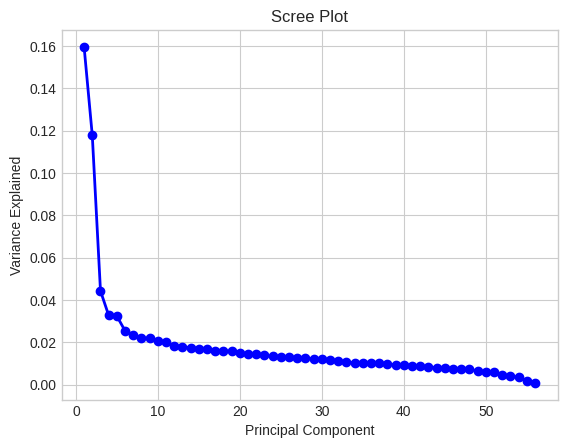

In [26]:
from sklearn.decomposition import PCA
#Making a SCREE PLot to see the ideal number of components
pcaStand = PCA() #performing plot with default number of components
X_trainStand = pcaStand.fit_transform(X_train)
X_testStand = pcaStand.transform(X_test)
PC_values = np.arange(pcaStand.n_components_) + 1
#Creating our plot
plt.plot(PC_values, pcaStand.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


We can see that looking at 2, 4, and 5 Components would be interesting for our dataset. Since 4 and 5 components are at the elbow of the Scree Plot we will look at both of them, just to confirm that choosing 4 components versus 5 means we do not miss a lot of variance.

In [27]:
# Applying PCA function on training (2 Component)
# and testing set of X component
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2) #TUNING PARAMETER, CAN CHANGE TO SEE

X_train2 = pca2.fit_transform(X_train)
X_test2 = pca2.transform(X_test)

explained_variance2 = pca2.explained_variance_ratio_
#explained_variance variable output:
#Standard scaling array([0.11296571, 0.05603644]),
#Yeo-johnson array([0.15960005, 0.11770709])
explained_variance2

array([0.15960005, 0.11770709])

In [28]:
# Applying PCA function on training (4 component)
# and testing set of X component
from sklearn.decomposition import PCA

pca4 = PCA(n_components=4) #TUNING PARAMETER, CAN CHANGE TO SEE

X_train4 = pca4.fit_transform(X_train)
X_test4 = pca4.transform(X_test)

explained_variance4 = pca4.explained_variance_ratio_
#explained_variance variable output:
#Standard scaling array([0.11296571, 0.05603645, 0.03301511, 0.02967709])
#Yeo-johnson array([0.15960005, 0.11770709, 0.0442429 , 0.03269732])
#We can see that Yeo-Johnson significantly captures more of the variance in the data
explained_variance4

array([0.15960005, 0.11770709, 0.04424293, 0.03269678])

In [29]:
# Applying PCA function on training (5 component)
# and testing set of X component
from sklearn.decomposition import PCA

pca5 = PCA(n_components=5) #TUNING PARAMETER, CAN CHANGE TO SEE

X_train5 = pca5.fit_transform(X_train)
X_test5 = pca5.transform(X_test)

explained_variance5 = pca5.explained_variance_ratio_
#explained_variance variable output:
#Standard scaling array([0.11296571, 0.05603645, 0.03300406, 0.02967096, 0.02818831])
#Yeo-johnson array([0.15960005, 0.11770709, 0.04424284, 0.03269763, 0.03233106])
#We can see that compared to PCA with 4 Components
#PCA with 5 components captures an incrementally larger portion of the variance
explained_variance5

array([0.15960005, 0.11770709, 0.0442429 , 0.03269615, 0.03233195])

# LOGISTIC with 2 PCA Components with Yeo-Johnson Scaling

In [30]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train2, y_train)

LogisticRegression(random_state=0)

In [31]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred2 = classifier2.predict(X_test2)

In [32]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
cm2



array([[458,  37],
       [ 49, 298]])

# LOGISTIC with 4 PCA Components with Yeo-Johnson Scaling


In [33]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train4, y_train)

LogisticRegression(random_state=0)

In [34]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred4 = classifier4.predict(X_test4)

In [35]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred4)
cm4


array([[463,  32],
       [ 34, 313]])

# LOGISTIC with 5 PCA Components with Yeo-Johnson Scaling


In [36]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier5 = LogisticRegression(random_state = 0)
classifier5.fit(X_train5, y_train)

LogisticRegression(random_state=0)

In [37]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred5 = classifier5.predict(X_test5)

In [38]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm5 = confusion_matrix(y_test, y_pred5)
cm5


array([[463,  32],
       [ 32, 315]])

# Plotting 2 component PCA Logistic Regression with training and test data

<ipython-input-39-3ea60a328575>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


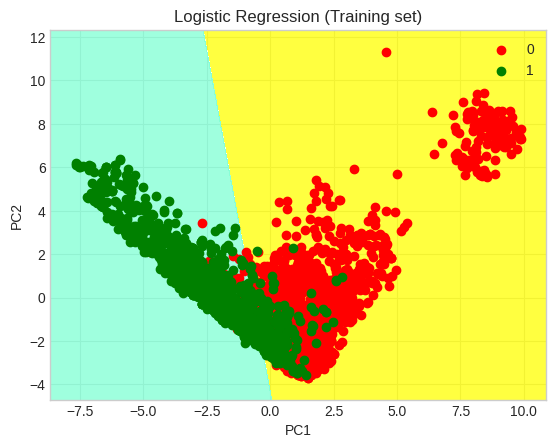

In [39]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                    stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                    stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(),
            X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
            cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

<ipython-input-40-d0b442b2dc26>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


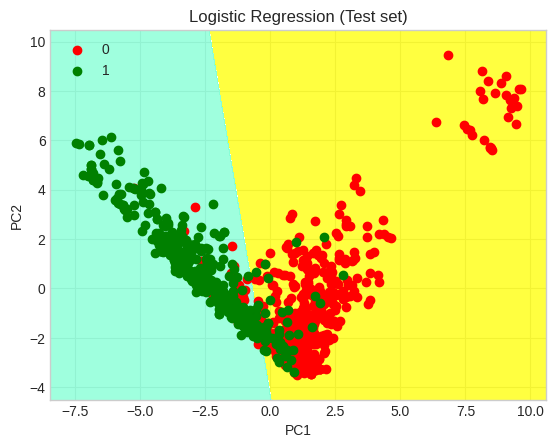

In [40]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test2, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                    stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                    stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(),
            X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
            cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

In [41]:
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# #PCA with .95 variance accounted for
# pca = PCA(.95)
# pca.fit(X_train)
# #transforming the training data
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
# classifierPCA = LogisticRegression(random_state=0)
# classifierPCA.fit(X_train, y_train)
# y_pred=classifierPCA.predict(X_test)
# classifierPCA.score(y_test.reshape(-1,1),y_pred.reshape(-1,1))

Accuracy Scores for 2,4,5 Components for PCA

In [42]:
from sklearn.metrics import classification_report
print("Logistic Regression Results for PCA components=2\n With Yeo Johnson Scaling")
print(classification_report(y_test, y_pred2, target_names=['0', '1'],digits=4))

print("Logistic Regression Results for PCA components=4\n With Yeo Johnson Scaling")
print(classification_report(y_test, y_pred4, target_names=['0', '1'],digits=4))

print("Logistic Regression Results for PCA components=5\n With Yeo Johnson Scaling")
print(classification_report(y_test, y_pred5, target_names=['0', '1'],digits=4))

Logistic Regression Results for PCA components=2
 With Yeo Johnson Scaling
              precision    recall  f1-score   support

           0     0.9034    0.9253    0.9142       495
           1     0.8896    0.8588    0.8739       347

    accuracy                         0.8979       842
   macro avg     0.8965    0.8920    0.8940       842
weighted avg     0.8977    0.8979    0.8976       842

Logistic Regression Results for PCA components=4
 With Yeo Johnson Scaling
              precision    recall  f1-score   support

           0     0.9316    0.9354    0.9335       495
           1     0.9072    0.9020    0.9046       347

    accuracy                         0.9216       842
   macro avg     0.9194    0.9187    0.9190       842
weighted avg     0.9216    0.9216    0.9216       842

Logistic Regression Results for PCA components=5
 With Yeo Johnson Scaling
              precision    recall  f1-score   support

           0     0.9354    0.9354    0.9354       495
           1

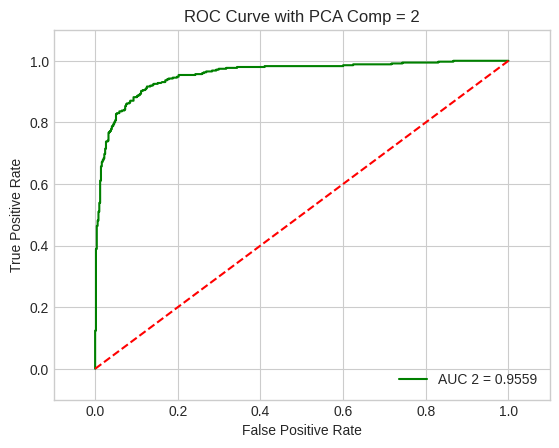

In [43]:
import sklearn.metrics as metrics

probs2 = classifier2.predict_proba(X_test2)
preds2 = probs2[:,1]
fp2, tp2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fp2, tp2)


plt.title('ROC Curve with PCA Comp = 2')
plt.plot(fp2, tp2, 'g', label = 'AUC 2 = %0.4f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

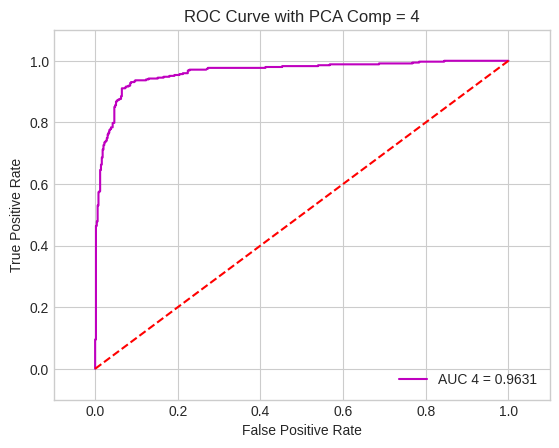

In [44]:
import sklearn.metrics as metrics

probs4 = classifier4.predict_proba(X_test4)
preds4 = probs4[:,1]
fp4, tp4, threshold4 = metrics.roc_curve(y_test, preds4)
roc_auc4 = metrics.auc(fp4, tp4)


plt.title('ROC Curve with PCA Comp = 4')
plt.plot(fp4, tp4, 'm', label = 'AUC 4 = %0.4f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

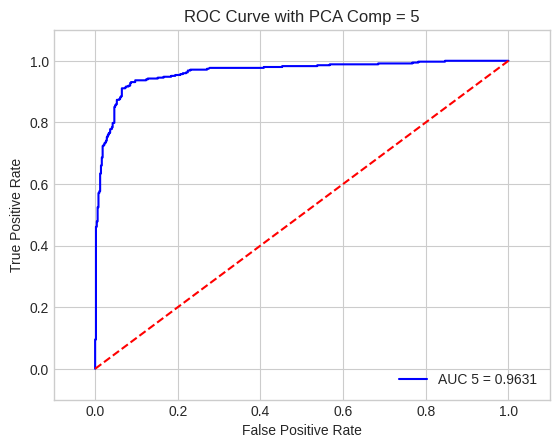

In [45]:
import sklearn.metrics as metrics

probs5 = classifier5.predict_proba(X_test5)
preds5 = probs5[:,1]
fp5, tp5, threshold5 = metrics.roc_curve(y_test, preds5)
roc_auc5 = metrics.auc(fp5, tp5)


plt.title('ROC Curve with PCA Comp = 5')
plt.plot(fp5, tp5, 'b', label = 'AUC 5 = %0.4f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

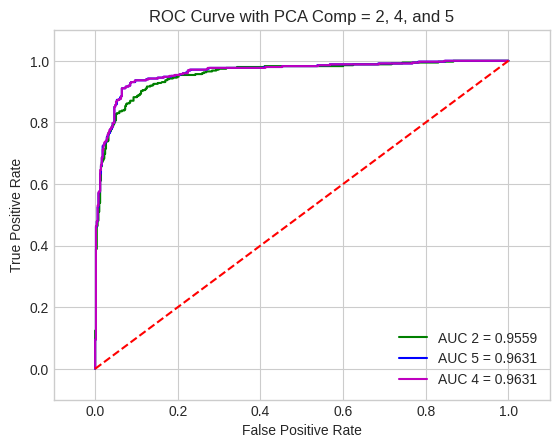

In [46]:
import sklearn.metrics as metrics

plt.title('ROC Curve with PCA Comp = 2, 4, and 5')
plt.plot(fp2, tp2, 'g', label = 'AUC 2 = %0.4f' % roc_auc2)
plt.plot(fp5, tp5, 'b', label = 'AUC 5 = %0.4f' % roc_auc5)
plt.plot(fp4, tp4, 'm', label = 'AUC 4 = %0.4f' % roc_auc4)
#note I plotted the ROC curve of 4 components after PCA
# of 5 components because they overlap each other

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()